## Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
bac = pd.read_csv('train_set.csv')
bac.head()

,Unnamed: 0,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,moyeneGeneral,Decision,Note1,...,Note3,Note4,Note5,Note6,Note7,Note8,Willaya,moughataa,DateNaissance,ID
0,27634,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,4.601562,Ajourné,1.625,...,5.00,5.500,3.00,7.75,7.50,18.5,Nouakchott 2 (Ouest),KSAR,12 ديسمبر 1998,ID_27634
1,36311,Mariem Yedaly Afane,LO,LO1,Beir Taouress,Lycée Arafat 2 (A),Lycée Arafat 2,7.625000,Ajourné,13.000,...,10.75,2.000,8.75,2.00,0.75,-1.0,Nouakchott 3 (Sud),ARAFAT,26 ديسمبر 1991,ID_36311
2,21059,Aiche Jiyid Jiyid,LM,LM3,Akjoujt,Lycée Akjoujt,Lycée Akjoujt,6.894531,Ajourné,7.000,...,6.50,7.625,1.00,5.50,10.00,17.0,Inchiri,AKJOUJT,8 مايو 1995,ID_21059
3,24532,Ahmed Abd El Ghader Meissa,SN,SN06,Chelkhet Tiyab,Lycée Toujounine 1,Lycée Toujounine 1,4.859375,Ajourné,1.750,...,5.50,5.500,5.00,1.50,7.50,17.0,Nouakchott 1 (Nord),TOUJOUNINE,24 avr. 1999,ID_24532
4,17861,Mariam Abdoulaye Ba,SN,SN03,Aere M'Bar,Lycée Nouadhibou 2,Lycée Wava Nouadhibou,3.548387,Ajourné,4.500,...,3.50,4.000,4.00,2.00,2.00,-1.0,Dakhlet NDB,NOUADHIBOU,10 mai 2001,ID_17861


In [3]:
bac.shape

(23894, 21)

In [4]:
bac.columns

Index(['Unnamed: 0', 'Nom', 'Serie,x', 'GroupeAnonymat', 'LieuNaissance',
       'Centre', 'Etablissement', 'moyeneGeneral', 'Decision', 'Note1',
       'Note2', 'Note3', 'Note4', 'Note5', 'Note6', 'Note7', 'Note8',
       'Willaya', 'moughataa', 'DateNaissance', 'ID'],
      dtype='object')

In [5]:
bac['Decision'].value_counts()

Ajourné                                  18966
Admis                                     1973
Sessionnaire                              1530
Abscent                                   1068
Examen annulé à cause du Téléphone         351
Examen annulé à cause du comportement        6
Name: Decision, dtype: int64

In [6]:
bac= bac.drop(columns=['Unnamed: 0'])

In [8]:
### Creating A new column 'Age'
import datetime
import dateparser

def calculate_age(birth_date):
    # convertir la date en format date
    birth_date = dateparser.parse(birth_date, languages=['ar', 'fr'])
    # calculer la différence entre la date de naissance et aujourd'hui
    age = datetime.date.today().year - birth_date.year - ((datetime.date.today().month, datetime.date.today().day) < (birth_date.month, birth_date.day))
    # retourner l'âge
    return age
bac['Age'] = bac['DateNaissance'].apply(calculate_age)

In [9]:
bac.head()

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,moyeneGeneral,Decision,Note1,Note2,...,Note4,Note5,Note6,Note7,Note8,Willaya,moughataa,DateNaissance,ID,Age
0,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,4.601562,Ajourné,1.625,4.250,...,5.500,3.00,7.75,7.50,18.5,Nouakchott 2 (Ouest),KSAR,12 ديسمبر 1998,ID_27634,24
1,Mariem Yedaly Afane,LO,LO1,Beir Taouress,Lycée Arafat 2 (A),Lycée Arafat 2,7.625000,Ajourné,13.000,5.875,...,2.000,8.75,2.00,0.75,-1.0,Nouakchott 3 (Sud),ARAFAT,26 ديسمبر 1991,ID_36311,31
2,Aiche Jiyid Jiyid,LM,LM3,Akjoujt,Lycée Akjoujt,Lycée Akjoujt,6.894531,Ajourné,7.000,8.250,...,7.625,1.00,5.50,10.00,17.0,Inchiri,AKJOUJT,8 مايو 1995,ID_21059,27
3,Ahmed Abd El Ghader Meissa,SN,SN06,Chelkhet Tiyab,Lycée Toujounine 1,Lycée Toujounine 1,4.859375,Ajourné,1.750,6.000,...,5.500,5.00,1.50,7.50,17.0,Nouakchott 1 (Nord),TOUJOUNINE,24 avr. 1999,ID_24532,23
4,Mariam Abdoulaye Ba,SN,SN03,Aere M'Bar,Lycée Nouadhibou 2,Lycée Wava Nouadhibou,3.548387,Ajourné,4.500,3.000,...,4.000,4.00,2.00,2.00,-1.0,Dakhlet NDB,NOUADHIBOU,10 mai 2001,ID_17861,21


## Data preprocessing

In [10]:
import xgboost as xgb
#from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler,LabelEncoder,LabelBinarizer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay,f1_score

# Import train_test_split function
from sklearn.model_selection import train_test_split,RandomizedSearchCV
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

In [11]:
# Split the data into features (X) and target (y)
X = bac.drop(['Decision','moyeneGeneral', 'Note1','DateNaissance',
       'Note2', 'Note3', 'Note4', 'Note5', 'Note6', 'Note7', 'Note8'], axis=1)
y = pd.DataFrame({'Decision':bac['Decision']})


In [12]:
X = X.set_index('ID')
y = y.set_index(pd.RangeIndex(start=0, stop=len(y)))

In [13]:
X.head()

,Nom,"Serie,x",GroupeAnonymat,LieuNaissance,Centre,Etablissement,Willaya,moughataa,Age
ID,,,,,,,,,
ID_27634,El Ide Brahim M'Hadi,SN,SN09,Bathet meit,Lycée Jedida,Lycée Jedida,Nouakchott 2 (Ouest),KSAR,24
ID_36311,Mariem Yedaly Afane,LO,LO1,Beir Taouress,Lycée Arafat 2 (A),Lycée Arafat 2,Nouakchott 3 (Sud),ARAFAT,31
ID_21059,Aiche Jiyid Jiyid,LM,LM3,Akjoujt,Lycée Akjoujt,Lycée Akjoujt,Inchiri,AKJOUJT,27
ID_24532,Ahmed Abd El Ghader Meissa,SN,SN06,Chelkhet Tiyab,Lycée Toujounine 1,Lycée Toujounine 1,Nouakchott 1 (Nord),TOUJOUNINE,23
ID_17861,Mariam Abdoulaye Ba,SN,SN03,Aere M'Bar,Lycée Nouadhibou 2,Lycée Wava Nouadhibou,Dakhlet NDB,NOUADHIBOU,21


In [14]:
# Split dataset into training set and test set
X_train = X.iloc[0:15930,:] 
X_test = X.iloc[15930:,:]
y_train = y.iloc[0:15930,:]
y_test =y.iloc[15930:,:]

In [15]:
X_train.reset_index(inplace=True)
X_test.reset_index(inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [16]:
# define the categorical columns to be one-hot encoded
categorical_cols = ['Nom', 'Serie,x', 'GroupeAnonymat', 'LieuNaissance',
       'Centre', 'Etablissement','Willaya', 'moughataa', 'ID']
# create the preprocessing pipeline for numerical columns
#numerical_transformer = Pipeline(steps=[
 #   ('scaler', StandardScaler())])

# create the preprocessing pipeline for categorical columns
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))])

# create a column transformer to apply the numerical and categorical preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)])

# fit the preprocessing pipeline on the training data and transform both the training and testing data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\USER\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Building XGBOOST Model

In [17]:
from xgboost import XGBClassifier

# Create an XGBClassifier with CPU acceleration
xgb = XGBClassifier(tree_method='exact',n_estimators=100,learning_rate=0.2, gamma=0.3,booster='gblinear')

# Train the model and make predictions
xgb.fit(X_train_preprocessed, y_train_encoded)


[16:27:56] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-0fc7796c793e6356f-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "gamma", "tree_method" } are not used.



XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.3, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

## Evaluate the Model

In [18]:

y_pred = xgb.predict(X_test_preprocessed)

print('the accuracy = ',accuracy_score(y_test_encoded,y_pred))
print('f1=',f1_score(y_test_encoded,y_pred, average='weighted'))
train_score = len(y_train_encoded == xgb.predict(X_train_preprocessed)) / len(y_train_encoded)
print("Training accuracy:", train_score) ## Test the overfitting

the accuracy =  0.8002260170768458
f1= 0.72740570606882
Training accuracy: 1.0


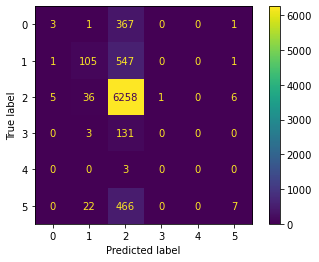

In [19]:
# Create the confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

## Model Deployement

In [20]:
test_set = pd.read_csv('test_set.csv',sep=';')
sub = pd.read_csv('submission_template.csv')
test_set = test_set.drop(columns=['Unnamed: 0','prediction'])

In [21]:
test_set['Age']=test_set['DateNaissance'].apply(calculate_age)

In [22]:
import pandas as pd


# Check if IDs in sub exist in test_set or bac
in_test_set = sub['Id'].isin(test_set['ID'])
in_bac = sub['Id'].isin(bac['ID'])

# Filter rows from test_set and bac that match IDs in sub
test_set_matches = test_set[test_set['ID'].isin(sub['Id'])]
bac_matches = bac[bac['ID'].isin(sub['Id'])]

# Merge the two matches dataframes into one
matches = pd.concat([test_set_matches, bac_matches])


In [23]:
matches = matches.drop(columns=['DateNaissance',
       'moyeneGeneral', 'Decision', 'Note1', 'Note2', 'Note3', 'Note4',
       'Note5', 'Note6', 'Note7', 'Note8'])

In [24]:
matches = matches.reindex(columns = ['ID', 'Nom', 'Serie,x', 'GroupeAnonymat', 'LieuNaissance', 'Centre',
       'Etablissement', 'Willaya', 'moughataa','Age'])

In [25]:
print(matches.columns)
print(X_train.columns)

Index(['ID', 'Nom', 'Serie,x', 'GroupeAnonymat', 'LieuNaissance', 'Centre',
       'Etablissement', 'Willaya', 'moughataa', 'Age'],
      dtype='object')
Index(['ID', 'Nom', 'Serie,x', 'GroupeAnonymat', 'LieuNaissance', 'Centre',
       'Etablissement', 'Willaya', 'moughataa', 'Age'],
      dtype='object')


In [26]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_cols)])

# fit the preprocessing pipeline on the training data
preprocessor.fit(X_train)

# transform both the training and testing data using the fitted transformer
X_train_preprocessed = preprocessor.transform(X_train)
test_preprocessed = preprocessor.transform(matches)

print(X_train_preprocessed.shape)
print(test_preprocessed.shape)

(15930, 32783)
(15930, 32783)


In [27]:
test_pred_proba = xgb.predict_proba(test_preprocessed)
probability=[test_pred_proba[i][1] for i in range(len(test_pred_proba))]

In [28]:
resultat = pd.DataFrame(matches['ID'])
#resultat['Valeur predit'] = y_predit
resultat['Predicted'] = probability
resultat[resultat['Predicted']>0.20].head(20)

,ID,Predicted
133,ID_327,0.200581
134,ID_330,0.425600
136,ID_332,0.863666
137,ID_333,0.200581
3614,ID_9071,0.782762
3615,ID_9072,0.634175
3616,ID_9074,0.208955
3625,ID_9096,0.604993
3630,ID_9116,0.872829
4396,ID_10990,0.204444


In [ ]:
# export the pridiction to csv file
resultat.to_csv('submission_xgb.csv', index=False)